In [1]:
ls

drive/  sample_data/


In [2]:
cd /content/drive/MyDrive/Flowers/flowers

/content/drive/MyDrive/Flowers/flowers


In [3]:
pwd

'/content/drive/MyDrive/Flowers/flowers'

Image Augmentation

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator( rescale= 1./225,zoom_range= 0.2,horizontal_flip=True,vertical_flip=True)

In [6]:
test_datagen = ImageDataGenerator( rescale= 1./225)

In [7]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/Flowers/flowers/Training",target_size=(64,64),
                                                   class_mode = "categorical",batch_size=24 )

Found 386 images belonging to 4 classes.


In [8]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/Flowers/flowers/Testing",target_size=(64,64),
                                                   class_mode = "categorical",batch_size=24 )

Found 340 images belonging to 4 classes.


In [9]:
x_train.class_indices

{'daisy': 0, 'rose': 1, 'sunflower': 2, 'tulip': 3}

Create Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [11]:
#initialize
model = Sequential()

Add Layers

In [12]:
model.add(Convolution2D(32,(3,3),activation = "relu",strides=(1,1),input_shape=(64,64,3)))

In [13]:
model.add( MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Flatten())

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.add(Dense(300,activation="relu"))
model.add(Dense(300,activation="relu"))

In [17]:
model.add(Dense(4,activation="softmax"))

Compile the model

In [18]:
model.compile(loss = "categorical_crossentropy",optimizer= "adam",metrics =['accuracy'])

In [19]:
len(x_train)

17

Fit the model

In [46]:
model.fit(x_train, epochs =10, steps_per_epoch= len(x_train)//10)

Epoch 1/10
1/1 [==============================] - 1s 630ms/step - loss: 0.6471 - accuracy: 0.8333
Epoch 2/10
1/1 [==============================] - 0s 394ms/step - loss: 0.9754 - accuracy: 0.6250
Epoch 3/10
1/1 [==============================] - 0s 335ms/step - loss: 1.3873 - accuracy: 0.5417
Epoch 4/10
1/1 [==============================] - 0s 353ms/step - loss: 0.7826 - accuracy: 0.6250
Epoch 5/10
1/1 [==============================] - 0s 318ms/step - loss: 0.9259 - accuracy: 0.5833
Epoch 6/10
1/1 [==============================] - 0s 342ms/step - loss: 0.8233 - accuracy: 0.6250
Epoch 7/10
1/1 [==============================] - 0s 319ms/step - loss: 0.8247 - accuracy: 0.5833
Epoch 8/10
1/1 [==============================] - 0s 343ms/step - loss: 0.8669 - accuracy: 0.5417
Epoch 9/10
1/1 [==============================] - 0s 323ms/step - loss: 0.7797 - accuracy: 0.5417
Epoch 10/10
1/1 [==============================] - 0s 323ms/step - loss: 0.8639 - accuracy: 0.7500


Save the model

In [47]:
model.save('flower.h5')

Test the model

In [48]:
import numpy as np

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [49]:
model=load_model('flower.h5')

In [50]:
img = image.load_img(r"/content/drive/MyDrive/Flowers/flowers/Training/rose/5693486585_cf64d87519_n.jpg")

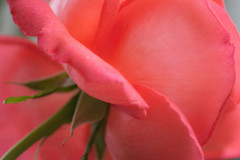

In [51]:
img

In [52]:
img = image.load_img(r"/content/drive/MyDrive/Flowers/flowers/Training/rose/5693486585_cf64d87519_n.jpg",target_size=(64,64))

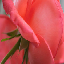

In [53]:
img

In [54]:
x =image.img_to_array(img)

In [55]:
x

array([[[ 88.,  97.,  76.],
        [107., 114.,  98.],
        [169.,  52.,  68.],
        ...,
        [151., 155., 158.],
        [158., 163., 167.],
        [165., 168., 173.]],

       [[ 96., 100.,  83.],
        [106., 124., 112.],
        [162.,  56.,  70.],
        ...,
        [154., 155., 159.],
        [158., 163., 167.],
        [166., 169., 174.]],

       [[102., 108.,  94.],
        [131., 126., 122.],
        [166.,  88., 102.],
        ...,
        [156., 155., 160.],
        [159., 164., 168.],
        [167., 170., 175.]],

       ...,

       [[196.,  70.,  94.],
        [190., 125., 123.],
        [ 86.,  86.,  32.],
        ...,
        [254., 101., 129.],
        [247., 105., 129.],
        [246.,  92., 120.]],

       [[191.,  86., 101.],
        [103., 110.,  59.],
        [ 77.,  73.,  25.],
        ...,
        [226.,  80., 103.],
        [225.,  76.,  98.],
        [198.,  77.,  92.]],

       [[174., 140., 128.],
        [ 84.,  77.,  23.],
        [ 76.,  

In [56]:
x=np.expand_dims(x,axis=0)

In [57]:
x

array([[[[ 88.,  97.,  76.],
         [107., 114.,  98.],
         [169.,  52.,  68.],
         ...,
         [151., 155., 158.],
         [158., 163., 167.],
         [165., 168., 173.]],

        [[ 96., 100.,  83.],
         [106., 124., 112.],
         [162.,  56.,  70.],
         ...,
         [154., 155., 159.],
         [158., 163., 167.],
         [166., 169., 174.]],

        [[102., 108.,  94.],
         [131., 126., 122.],
         [166.,  88., 102.],
         ...,
         [156., 155., 160.],
         [159., 164., 168.],
         [167., 170., 175.]],

        ...,

        [[196.,  70.,  94.],
         [190., 125., 123.],
         [ 86.,  86.,  32.],
         ...,
         [254., 101., 129.],
         [247., 105., 129.],
         [246.,  92., 120.]],

        [[191.,  86., 101.],
         [103., 110.,  59.],
         [ 77.,  73.,  25.],
         ...,
         [226.,  80., 103.],
         [225.,  76.,  98.],
         [198.,  77.,  92.]],

        [[174., 140., 128.],
       

In [59]:
pred=model.predict(x)

In [60]:
pred

array([[0., 1., 0., 0.]], dtype=float32)

In [61]:
x_test.class_indices

{'daisy': 0, 'rose': 1, 'sunflower': 2, 'tulip': 3}

In [62]:
index = ['daisy','rose','sunflowers','tulip']

In [63]:
index[np.argmax(pred)]

'rose'